In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from analysis_lib import *

# kBioReg vs Prosite Scanner

In [9]:
benchmark_df = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/pdb_alphamods_results.csv")

In [6]:
benchmark_df["TOTAL"] = pd.Series(benchmark_df.LOAD+benchmark_df.SEARCH)

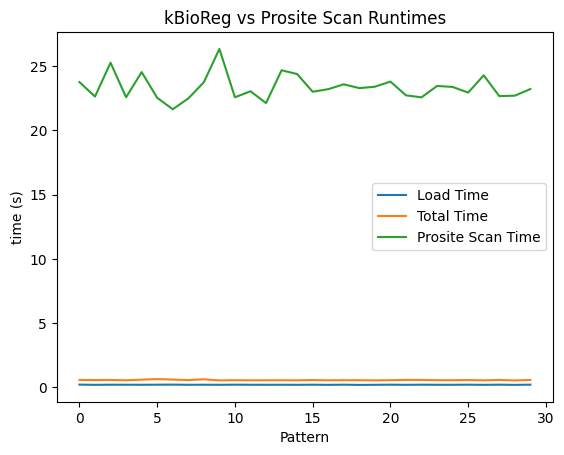

In [10]:
plt.title("kBioReg vs Prosite Scan Runtimes")

plt.plot(range(30), benchmark_df.LOAD, label="Load Time")
plt.plot(range(30), benchmark_df.TOTAL, label="Total Time")
plt.plot(range(30), benchmark_df.PS_SCAN, label="Prosite Scan Time")

plt.xlabel('Pattern')
plt.ylabel('time (s)')
plt.legend()
plt.savefig("pdb_scan.png")
plt.show()

# Multithreading Comparison

In [52]:
t1 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t1.csv")
t2 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t2.csv")
t4 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t4.csv")
t8 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t8.csv")
real_ps = pd.read_csv("/Users/rschwab/repos/kBioReg/real_timings.csv")

In [53]:
t1_exec_time = t1.TOTAL-t1.LOAD
t2_exec_time = t2.TOTAL-t2.LOAD
t4_exec_time = t4.TOTAL-t4.LOAD
t8_exec_time = t8.TOTAL-t8.LOAD

In [54]:
exec_df = pd.DataFrame(list(zip(t1_exec_time, t2_exec_time, t4_exec_time, t8_exec_time)))
exec_df.columns = ["T1", "T2", "T4", "T8"]
exec_df["ProSite"] = real_ps.ProSite

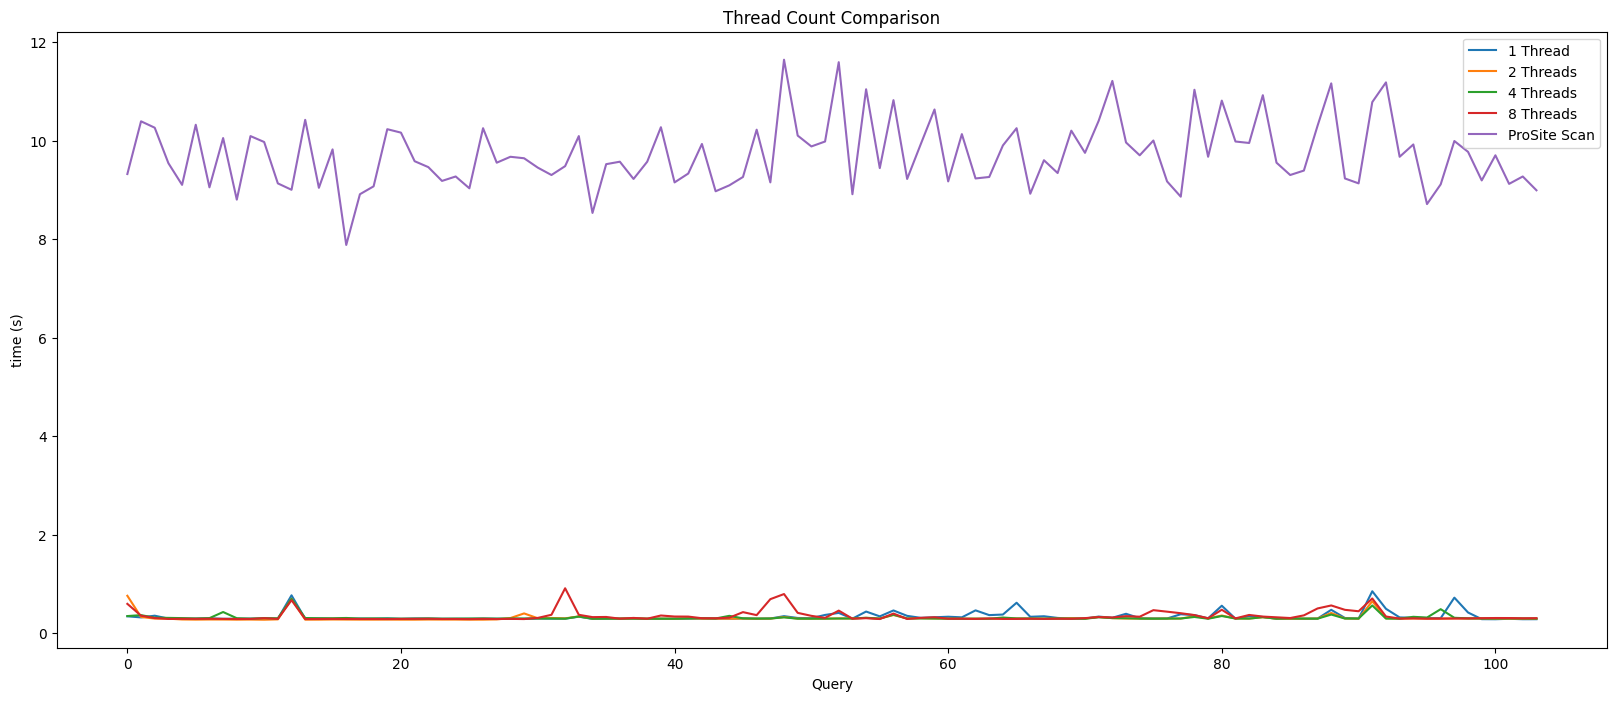

In [67]:
figure(figsize=(20,8))
plt.title("Thread Count Comparison")

plt.plot(range(104), exec_df.T1, label="1 Thread")
plt.plot(range(104), exec_df.T2, label="2 Threads")
plt.plot(range(104), exec_df.T4, label="4 Threads")
plt.plot(range(104), exec_df.T8, label="8 Threads")
plt.plot(range(104), exec_df.ProSite, label="ProSite Scan")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

# Swiss Prot Record Size Distributions

In [88]:
uniprot = pysam.FastaFile("/Users/rschwab/repos/kBioReg/data/REFERENCES/uniprot_sprot.fasta")

In [89]:
record_length_series = pd.Series(uniprot.lengths)
record_length_series.describe()

count    568744.000000
mean        361.406919
std         340.146814
min           2.000000
25%         169.000000
50%         295.000000
75%         449.000000
max       35213.000000
dtype: float64

<Axes: ylabel='Frequency'>

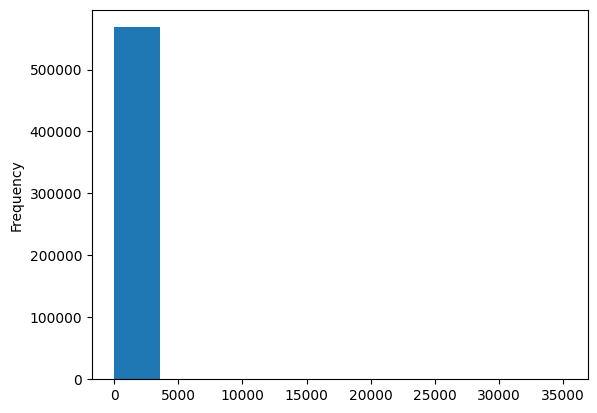

In [90]:
record_length_series.plot.hist()

# 

# Experimenting with DGrams

## Using a small, one-record FASTA File

In [5]:
dists = track_fasta("/Users/rschwab/repos/kBioReg/data/REFERENCES/aa_example.fna")

In [6]:
sum(dists)

494

## Using the whole SwissProt DB

In [7]:
dists = track_fasta("/Users/rschwab/repos/kBioReg/data/REFERENCES/uniprot_sprot.fasta")

In [8]:
sum(dists) # 3,756,722,694

3756722694

In [10]:
3756722694/1024

3668674.505859375

# Prosite vs csearch vs IBF vs HIBF

In [4]:
sprot_df = pd.read_csv("/Users/rschwab/repos/TetRex/data/RESULTS/swissprot_benchmarks_corrected.tsv", sep="\t")

In [14]:
# bin_count = pd.read_csv("/Users/rschwab/repos/TetRex/data/RESULTS/ground_truth_counts.txt")
# times_df['BIN_COUNT'] = bin_count

In [5]:
sprot_df['PROSITE_TIME'].describe()

count    116.000000
mean      10.235526
std        0.804253
min        9.103000
25%        9.643500
50%       10.060500
75%       10.721750
max       13.122000
Name: PROSITE_TIME, dtype: float64

In [6]:
sprot_df['EGREP'].describe()

count    116.000000
mean       9.938474
std       12.712512
min        1.982000
25%        2.916750
50%        4.576000
75%       11.409500
max       95.170000
Name: EGREP, dtype: float64

In [8]:
sprot_df['CSEARCH_TIME'].describe()

count    116.000000
mean       0.429406
std        0.073641
min        0.117684
25%        0.418489
50%        0.444300
75%        0.454357
max        0.647534
Name: CSEARCH_TIME, dtype: float64

In [10]:
sprot_df['TETREX_HIBF'].describe()

count    116.000000
mean       0.041554
std        0.123240
min        0.000589
25%        0.001674
50%        0.004441
75%        0.021761
max        1.034600
Name: TETREX_HIBF, dtype: float64

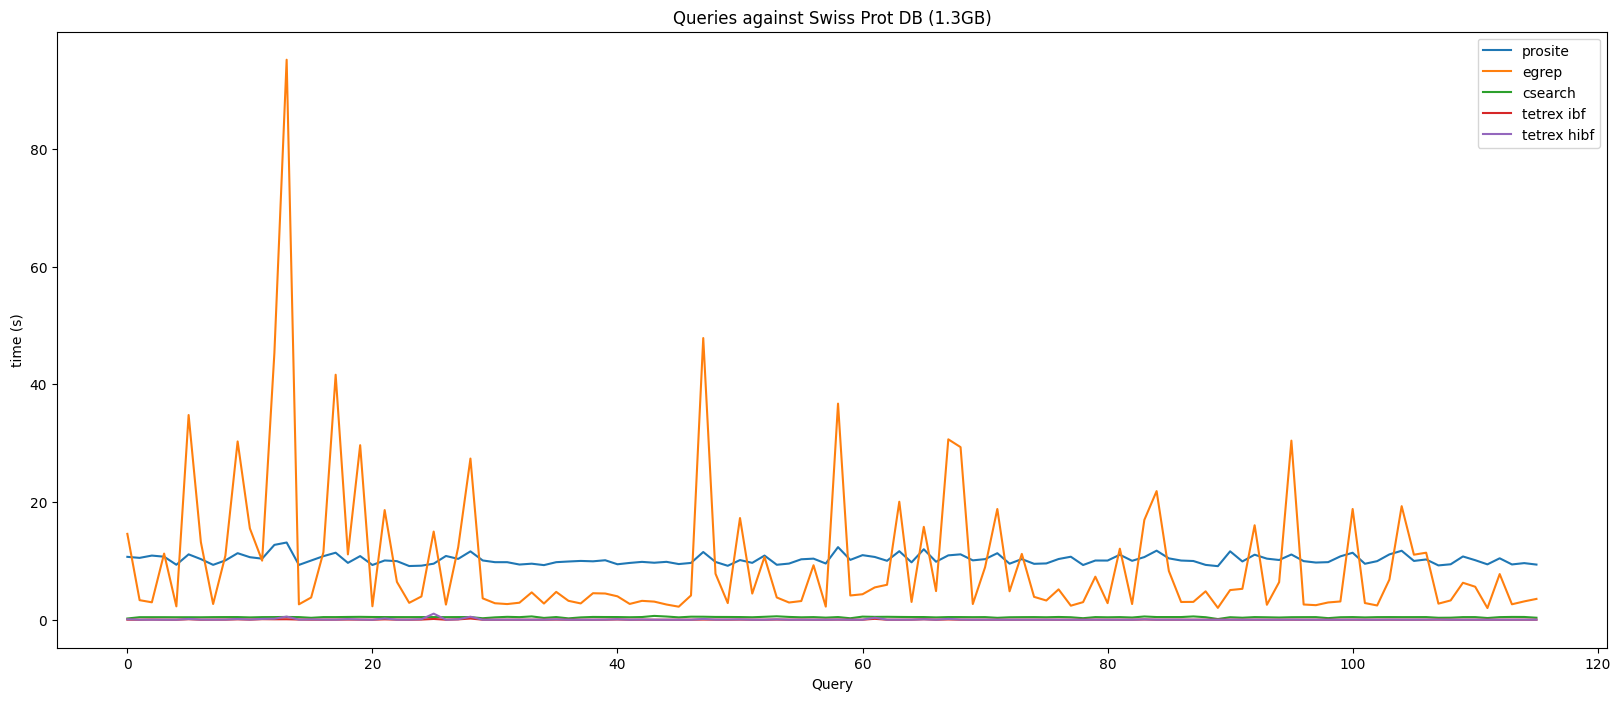

In [45]:
figure(figsize=(20,8))
plt.title("Queries against Swiss Prot DB (1.3GB)")

plt.plot(range(116), sprot_df.PROSITE_TIME, label="prosite")
plt.plot(range(116), sprot_df.EGREP, label="egrep")
plt.plot(range(116), sprot_df.CSEARCH_TIME, label="csearch")
plt.plot(range(116), sprot_df.TETREX_IBF, label="tetrex ibf")
plt.plot(range(116), sprot_df.TETREX_HIBF, label="tetrex hibf")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

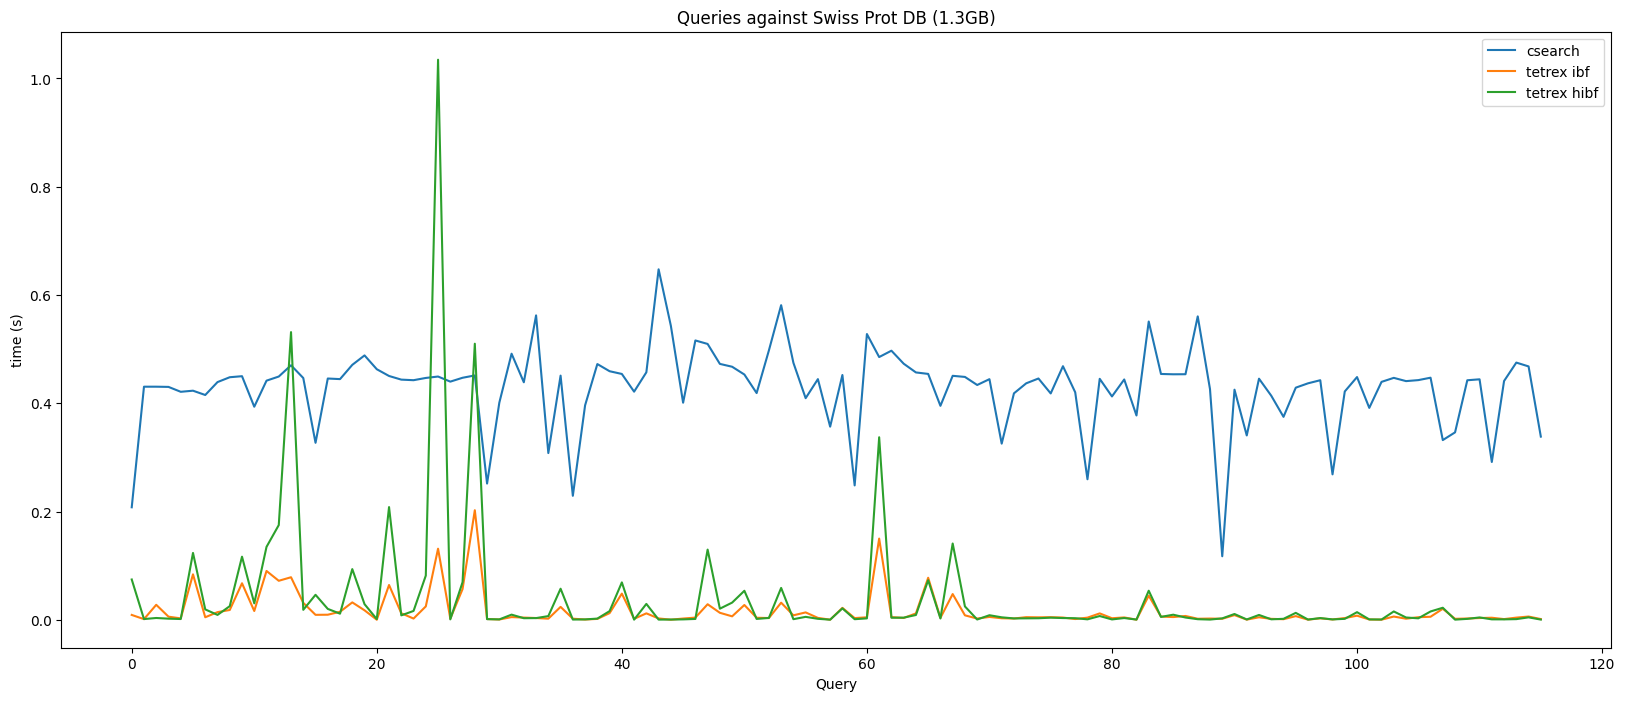

In [46]:
figure(figsize=(20,8))
plt.title("Queries against Swiss Prot DB (1.3GB)")

plt.plot(range(116), sprot_df.CSEARCH_TIME, label="csearch")
plt.plot(range(116), sprot_df.TETREX_IBF, label="tetrex ibf")
plt.plot(range(116), sprot_df.TETREX_HIBF, label="tetrex hibf")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

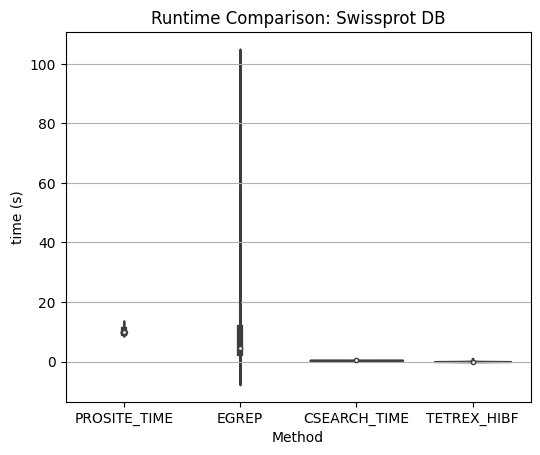

In [69]:
fig, axes = plt.subplots()
sns.violinplot(data=sprot_df[['PROSITE_TIME','EGREP','CSEARCH_TIME','TETREX_HIBF']], ax = axes)
axes.set_title('Runtime Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('time (s)')
fig.set_figwidth(6)

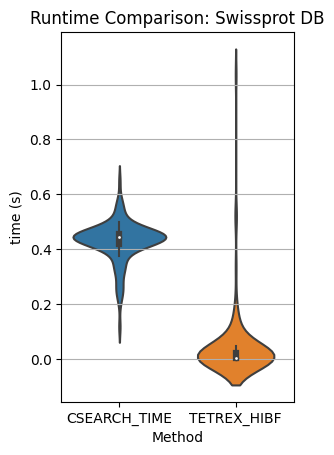

In [70]:
fig, axes = plt.subplots()
sns.violinplot(data=sprot_df[['CSEARCH_TIME','TETREX_HIBF']], ax = axes)
axes.set_title('Runtime Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('time (s)')
fig.set_figwidth(3)

# FP Analysis

## IBF

In [147]:
tetrex_ibf_output = "/Users/rschwab/repos/TetRex/data/RESULTS/fp_analysis/"
tetrex_ibf_results, ibf_true_positives = compare_to_prosite(tetrex_output=tetrex_ibf_output)

In [148]:
ibf_false_positives = [(pred-tp) for pred, tp in zip(tetrex_ibf_results, ibf_true_positives)]

In [149]:
sum(ibf_false_positives)

188

<Axes: ylabel='Frequency'>

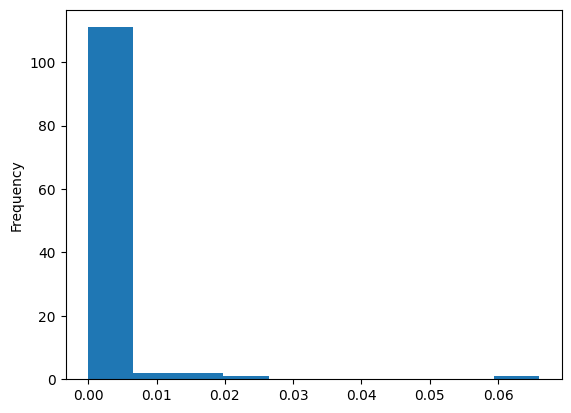

In [150]:
pd.Series([fp/((1024-tp)) for fp,tp in zip(ibf_false_positives, tetrex_ibf_results)]).plot.hist()

<Axes: ylabel='Frequency'>

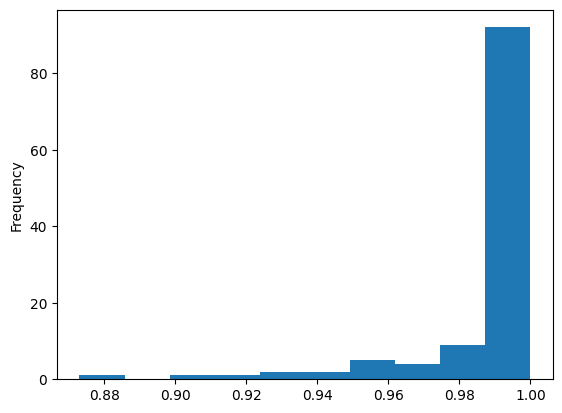

In [163]:
pd.Series([(1024-pred)/1024 for pred in tetrex_ibf_results]).plot.hist()

## HIBF

In [151]:
tetrex_hibf_output = "/Users/rschwab/repos/TetRex/data/RESULTS/fp_analysis_hibf/"
tetrex_hibf_results, hibf_true_positives = compare_to_prosite(tetrex_output=tetrex_hibf_output)

In [161]:
hibf_false_positives = [(pred-tp) for pred, tp in zip(tetrex_hibf_results, hibf_true_positives)]
sum(hibf_false_positives)

2431

In [160]:
# os.listdir(tetrex_hibf_output)[max(range(len(hibf_false_positives)), key=hibf_false_positives.__getitem__)]
max(hibf_false_positives)


748

<Axes: ylabel='Frequency'>

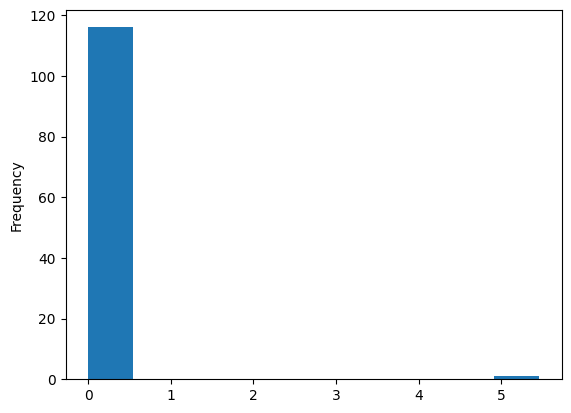

In [132]:
pd.Series([fp/((1024-tp)) for fp,tp in zip(false_positives, tetrex_results)]).plot.hist()

In [166]:
pd.Series([(1024-pred)/1024 for pred in tetrex_hibf_results]).describe()

count    117.000000
mean       0.968399
std        0.090454
min        0.133789
25%        0.977539
50%        0.996094
75%        0.998047
max        1.000000
dtype: float64

# Simulated DNA Benchmarks

In [12]:
info_df = pd.read_csv("/Users/rschwab/repos/TetRex/data/RESULTS/DNA_Simulated_Benchmarks.csv")

In [13]:
info_df

,RegEx_ID,Tool,QueryTime (s),Bin_Reduction (%),All_Matches_Found
0,1,egrep,24.037000,NaN,True
1,2,egrep,32.882000,NaN,True
2,3,egrep,26.313000,NaN,True
3,4,egrep,24.481000,NaN,True
4,5,egrep,18.715000,NaN,True
5,1,csearch,23.261056,0.000,False
6,2,csearch,26.106174,0.000,False
7,3,csearch,20.055129,0.000,False
8,4,csearch,25.700416,0.000,False
9,5,csearch,30.490770,0.000,True


In [15]:
info_df['QueryTime (s)'][info_df['Tool'] == 'egrep'].describe()

count     5.000000
mean     25.285600
std       5.102451
min      18.715000
25%      24.037000
50%      24.481000
75%      26.313000
max      32.882000
Name: QueryTime (s), dtype: float64

In [16]:
info_df['QueryTime (s)'][info_df['Tool'] == 'csearch'].describe()

count     5.000000
mean     25.122709
std       3.849128
min      20.055129
25%      23.261056
50%      25.700416
75%      26.106174
max      30.490770
Name: QueryTime (s), dtype: float64

In [17]:
info_df['QueryTime (s)'][info_df['Tool'] == 'tetrex'].describe()

count    5.000000
mean     0.089161
std      0.124447
min      0.000611
25%      0.015441
50%      0.016025
75%      0.118499
max      0.295227
Name: QueryTime (s), dtype: float64

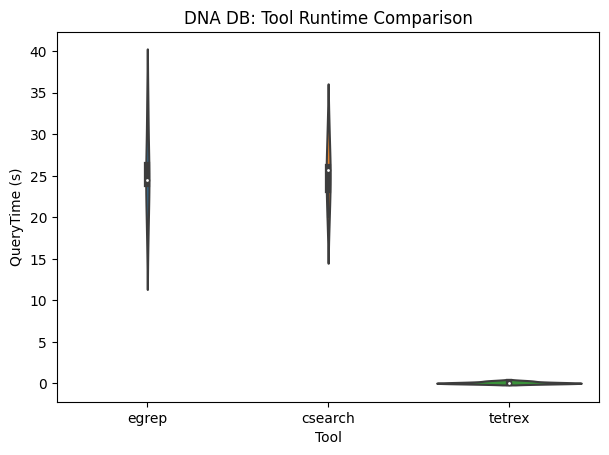

In [18]:
fig, ax = plt.subplots()
sns.violinplot(data=info_df, x="Tool", y="QueryTime (s)", ax=ax).set_title("DNA DB: Tool Runtime Comparison")
fig.set_figwidth(7)

In [77]:
info_df['Fraction_Verified'] = 100-info_df['Bin_Reduction (%)']

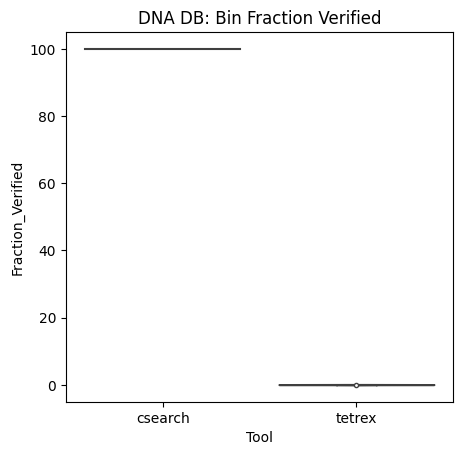

In [83]:
fig, ax = plt.subplots()
sns.violinplot(data=info_df[info_df.Tool != "egrep"], x="Tool", y="Fraction_Verified", ax=ax).set_title("DNA DB: Bin Fraction Verified")
axes.yaxis.grid(True)
fig.set_figwidth(8)

In [111]:
pd.Series([egrep/tetrex for egrep, tetrex in zip(info_df['QueryTime (s)'][info_df['Tool'] == "egrep"],info_df['QueryTime (s)'][info_df['Tool'] == "tetrex"])]).describe()

count        5.000000
mean      6811.699408
std      13319.209649
min         89.128027
25%        277.487574
50%       1500.006240
75%       1585.454310
max      30606.420889
dtype: float64

In [112]:
pd.Series([egrep/tetrex for egrep, tetrex in zip(info_df['QueryTime (s)'][info_df['Tool'] == "csearch"],info_df['QueryTime (s)'][info_df['Tool'] == "tetrex"])]).describe()

count        5.000000
mean     10653.741447
std      21931.049224
min         67.931214
25%        220.307129
50%       1451.584164
75%       1664.426936
max      49864.457791
dtype: float64

# Bin analysis for real this time

In [50]:
sprot_df['TETREX_FP'] = pd.Series(sprot_df.TETREX_BINS-sprot_df.BIN_COUNT)

In [51]:
sprot_df['CSEARCH_FP'] = pd.Series(sprot_df.CSEARCH_BINS-sprot_df.BIN_COUNT)

In [59]:
sprot_df

,NAME,ID,PATTERN,GROUP_COUNT,REGEX,PROSITE_TIME,CSEARCH_TIME,TETREX_IBF,TETREX_HIBF,EGREP,BIN_COUNT,CSEARCH_BINS,TETREX_BINS,CSEARCH_FP,TETREX_FP,CSEARCH_REDUCTION,TETREX_REDUCTION
0,ANTENNAPEDIA,PS00032,[LIVMFE]-[FY]-P-W-M-[KRQTA],5,(L|I|V|M|F|E)(F|Y)PWM(K|R|Q|T|A),10.686,0.208119,0.009352,0.074809,14.592,7,479,561,472,554,53.222656,45.214844
1,ENGRAILED,PS00033,L-M-A-[EQ]-G-L-Y-N,7,LMA(E|Q)GLYN,10.512,0.430810,0.001576,0.001713,3.324,3,991,3,988,0,3.222656,99.707031
2,DNA_MISMATCH_REPAIR_1,PS00058,G-F-R-G-E-[AG]-L,6,GFRGE(A|G)L,10.902,0.430812,0.028046,0.003708,2.959,7,991,8,984,1,3.222656,99.218750
3,L_LDH,PS00064,[LIVMA]-G-[EQ]-H-G-[DN]-[ST],6,(L|I|V|M|A)G(E|Q)HG(D|N)(S|T),10.712,0.430432,0.006144,0.002450,11.240,3,993,10,990,7,3.027344,99.023438
4,G6P_DEHYDROGENASE,PS00069,D-H-[YF]-L-G-K-[EQK],6,DH(Y|F)LGK(E|Q|K),9.343,0.421385,0.002936,0.001794,2.271,1,959,4,958,3,6.347656,99.609375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,COE,PS01345,C-S-R-C-C-[DE]-[KR]-K-S-C,9,CSRCC(D|E)(K|R)KSC,9.409,0.291799,0.004174,0.001186,1.982,3,623,3,620,0,39.160156,99.707031
112,NODA,PS01349,[RHQ]-[ST]-W-[GSA]-G-A-R-P-E,8,(R|H|Q)(S|T)W(G|S|A)GARPE,10.440,0.441299,0.001652,0.001152,7.759,1,959,1,958,0,6.347656,99.902344
113,PHOSPHOKETOLASE_1,PS60002,E-G-G-E-L-G-Y,6,EGGELGY,9.395,0.475324,0.004374,0.001588,2.624,4,1003,4,999,0,2.050781,99.609375
114,CYCLOTIDE_MOEBIUS,PS60009,C-[GA]-E-[ST]-C-[FTV]-[GLTI]-G-[TSK]-C,9,C(G|A)E(S|T)C(F|T|V)(G|L|T|I)G(T|S|K)C,9.621,0.468257,0.006375,0.004876,3.115,10,1013,10,1003,0,1.074219,99.023438


Text(0, 0.5, 'Bin Count')

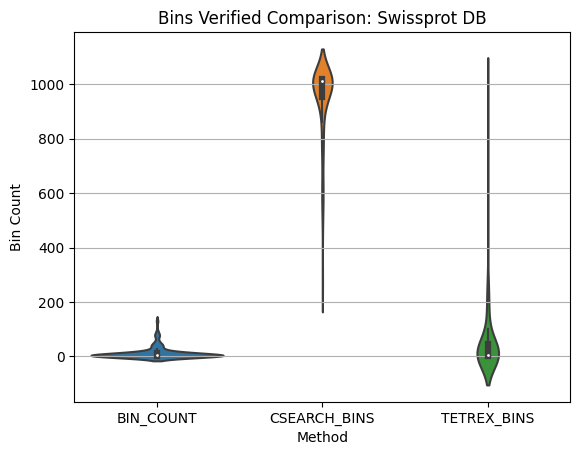

In [57]:
fig, axes = plt.subplots()
sns.violinplot(data=sprot_df[['BIN_COUNT','CSEARCH_BINS','TETREX_BINS']], ax = axes)
axes.set_title('Bins Verified Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('Bin Count')

Text(0, 0.5, 'FP Count')

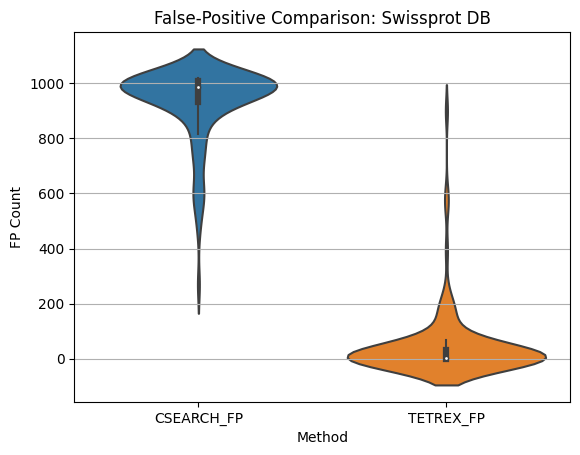

In [54]:
fig, axes = plt.subplots()
sns.violinplot(data=sprot_df[['CSEARCH_FP','TETREX_FP']], ax = axes)
axes.set_title('False-Positive Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('FP Count')

In [55]:
sprot_df['CSEARCH_REDUCTION'] = pd.Series([((1024-pred)/1024)*100 for pred in sprot_df['CSEARCH_BINS']])
sprot_df['TETREX_REDUCTION'] = pd.Series([((1024-pred)/1024)*100 for pred in sprot_df['TETREX_BINS']])

Text(0, 0.5, '% Reduction')

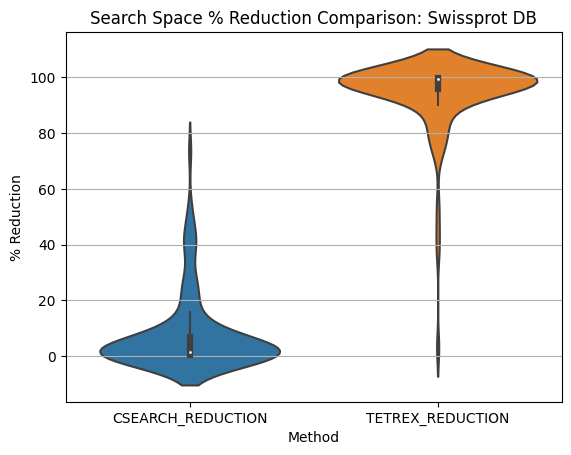

In [58]:
fig, axes = plt.subplots()
sns.violinplot(data=sprot_df[['CSEARCH_REDUCTION','TETREX_REDUCTION']], ax = axes)
axes.set_title('Search Space % Reduction Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('% Reduction')
fig.get_figwidth

In [60]:
sprot_df['CSEARCH_FRACTION'] = pd.Series([((pred)/1024)*100 for pred in sprot_df['CSEARCH_BINS']])
sprot_df['TETREX_FRACTION'] = pd.Series([((pred)/1024)*100 for pred in sprot_df['TETREX_BINS']])

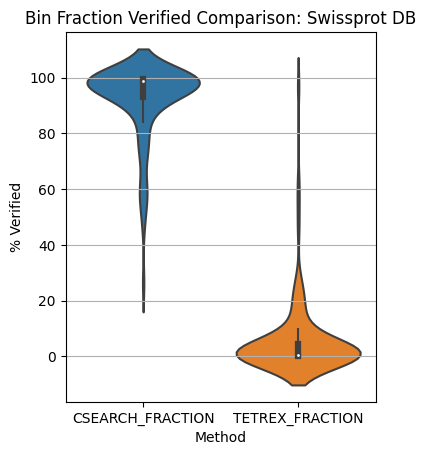

In [71]:
fig, axes = plt.subplots()
sns.violinplot(data=sprot_df[['CSEARCH_FRACTION','TETREX_FRACTION']], ax = axes)
axes.set_title('Bin Fraction Verified Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('% Verified')
fig.set_figwidth(4)

In [92]:
pd.Series(sprot_df['PROSITE_TIME']/sprot_df['TETREX_HIBF']).describe()

count      116.000000
mean      3817.878941
std       4196.558683
min          9.205490
25%        463.724243
50%       2343.485350
75%       5971.335751
max      16220.713073
dtype: float64

In [93]:
pd.Series(sprot_df['EGREP']/sprot_df['TETREX_HIBF']).describe()

count     116.000000
mean     1683.465308
std      1554.529277
min        14.484825
25%       325.869514
50%      1284.556941
75%      2719.191561
max      6735.243056
dtype: float64

In [94]:
pd.Series(sprot_df['CSEARCH_TIME']/sprot_df['TETREX_HIBF']).describe()

count    116.000000
mean     158.010850
std      180.972492
min        0.434535
25%       20.277944
50%       96.607218
75%      237.673362
max      903.115760
dtype: float64

## Hot and Cold Cache Benchmarking

In [335]:
sim_df = pd.read_csv("/Users/rschwab/repos/TetRex/data/RESULTS/melted_simulation_results.csv")

In [336]:
sim_df

,RegEx ID,Tool,Cache,total time (s),query time (s)
0,1,ripgrep,cold,9.562000,9.562000
1,2,ripgrep,cold,10.341000,10.341000
2,3,ripgrep,cold,21.840000,21.840000
3,4,ripgrep,cold,9.542000,9.542000
4,5,ripgrep,cold,11.385000,11.385000
5,1,ripgrep,hot,7.275000,7.275000
6,2,ripgrep,hot,8.595000,8.595000
7,3,ripgrep,hot,21.271000,21.271000
8,4,ripgrep,hot,7.019000,7.019000
9,5,ripgrep,hot,9.465000,9.465000


Text(0.5, 1.0, 'Total Runtime Comparison (Cold Cache)')

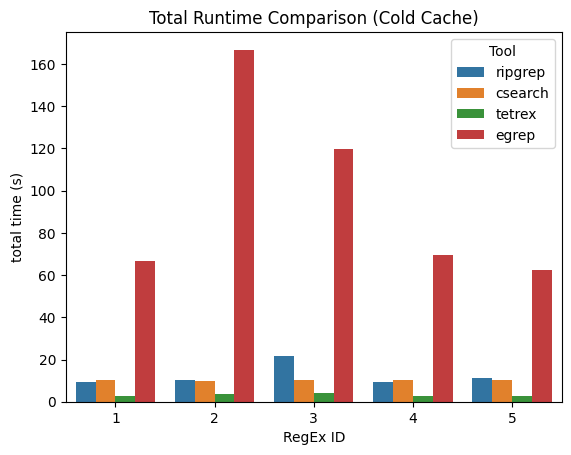

In [327]:
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="total time (s)", hue="Tool").set_title("Total Runtime Comparison (Cold Cache)")

Text(0.5, 1.0, 'Query Time Comparison (Cold Cache)')

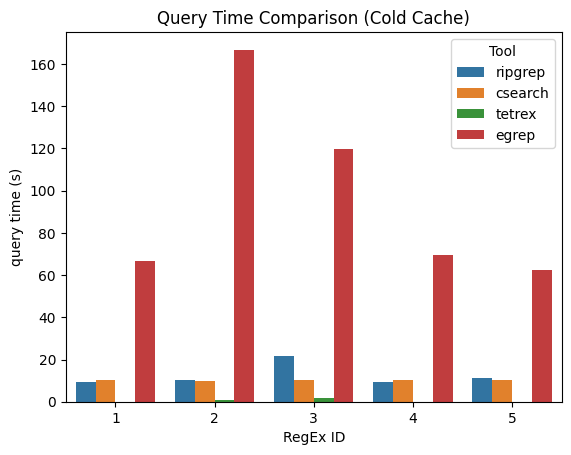

In [328]:
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="query time (s)", hue="Tool").set_title("Query Time Comparison (Cold Cache)")

Text(0.5, 1.0, 'Total Runtime Comparison (Hot Cache)')

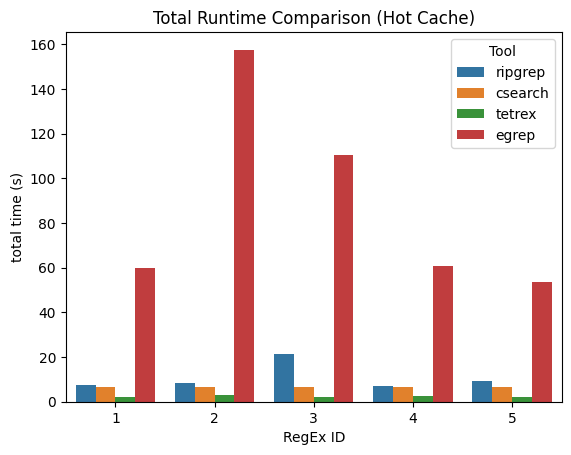

In [329]:
sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="total time (s)", hue="Tool").set_title("Total Runtime Comparison (Hot Cache)")

Text(0.5, 1.0, 'Query Time Comparison (Hot Cache)')

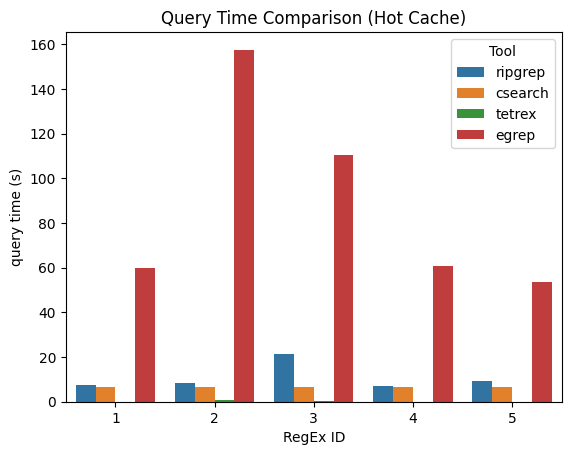

In [330]:
sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="query time (s)", hue="Tool").set_title("Query Time Comparison (Hot Cache)")

### Absolute Runtime with no Egrep

Text(0.5, 1.0, 'Total Runtime Comparison (Cold Cache)')

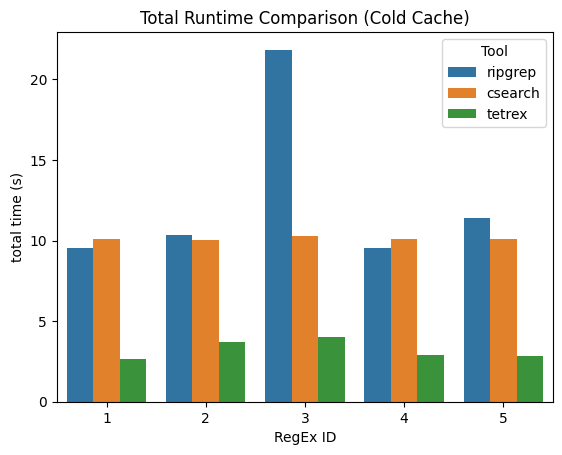

In [323]:
sns.barplot(sim_df[(sim_df["Cache"] == "cold") & (sim_df["Tool"] != "egrep")], x="RegEx ID", y="total time (s)", hue="Tool").set_title("Total Runtime Comparison (Cold Cache)")

Text(0.5, 1.0, 'Query time Comparison (Cold Cache)')

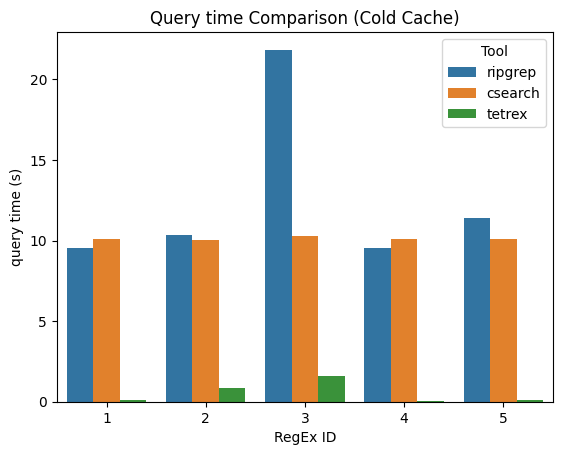

In [324]:
sns.barplot(sim_df[(sim_df["Cache"] == "cold") & (sim_df["Tool"] != "egrep")], x="RegEx ID", y="query time (s)", hue="Tool").set_title("Query time Comparison (Cold Cache)")

Text(0.5, 1.0, 'Total Runtime Comparison (Hot Cache)')

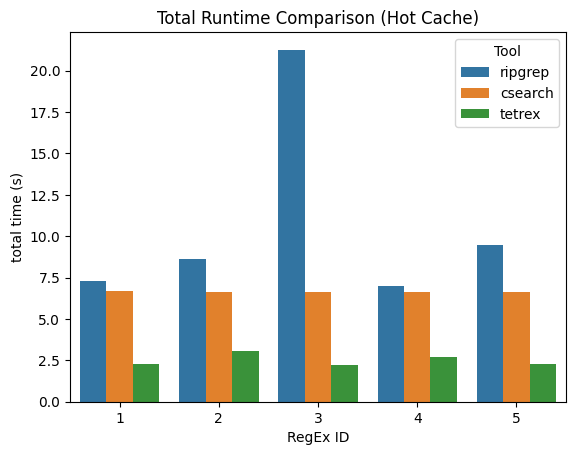

In [325]:
sns.barplot(sim_df[(sim_df["Cache"] == "hot") & (sim_df["Tool"] != "egrep")], x="RegEx ID", y="total time (s)", hue="Tool").set_title("Total Runtime Comparison (Hot Cache)")

Text(0.5, 1.0, 'Query time Comparison (Hot Cache)')

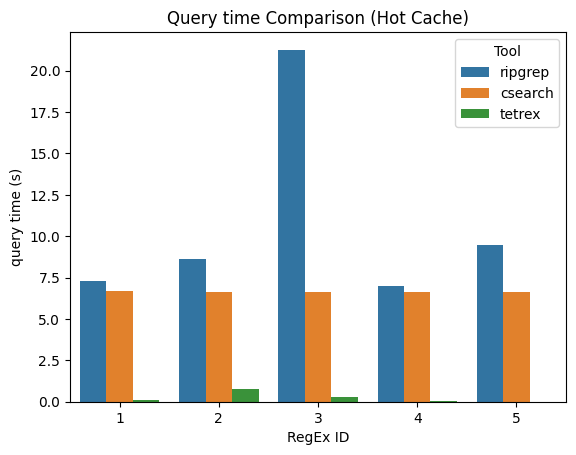

In [326]:
sns.barplot(sim_df[(sim_df["Cache"] == "hot") & (sim_df["Tool"] != "egrep")], x="RegEx ID", y="query time (s)", hue="Tool").set_title("Query time Comparison (Hot Cache)")

## Normalized Runtime Analysis

In [306]:
## Normalize times
# Get the reference times for tetrex
tetrex_times = sim_df[sim_df['Tool'] == 'tetrex'].set_index(['RegEx ID', 'Cache'])

# Merge the reference times with the original dataframe
sim_df = sim_df.set_index(['RegEx ID', 'Cache'])
sim_df['tetrex_total_time'] = tetrex_times['total time (s)']
sim_df['tetrex_query_time'] = tetrex_times['query time (s)']

# Normalize the times
sim_df['Normalized Total Time'] = sim_df['total time (s)'] / sim_df['tetrex_total_time']
sim_df['Normalized Query Time'] = sim_df['query time (s)'] / sim_df['tetrex_query_time']

# Reset index
sim_df = sim_df.reset_index()

# Drop the auxiliary columns if you don't need them anymore
sim_df.drop(columns=['tetrex_total_time', 'tetrex_query_time'], inplace=True)

Text(0.5, 1.0, 'Total Time Comparison (Cold Cache)')

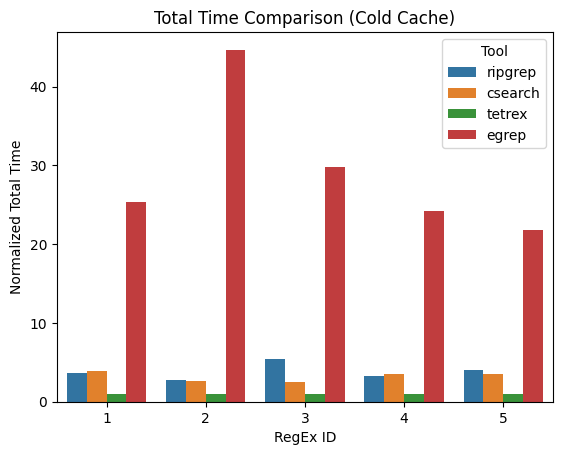

In [311]:
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="Normalized Total Time", hue="Tool").set_title("Total Time Comparison (Cold Cache)")

Text(0.5, 1.0, 'Query Time Comparison (Cold Cache)')

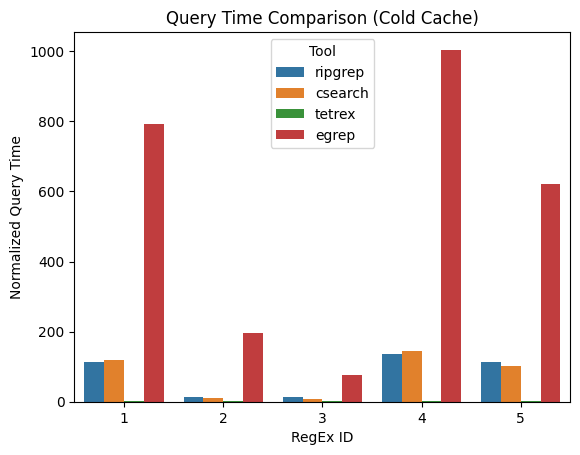

In [312]:
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="Normalized Query Time", hue="Tool").set_title("Query Time Comparison (Cold Cache)")

Text(0.5, 1.0, 'Total Time Comparison (Hot Cache)')

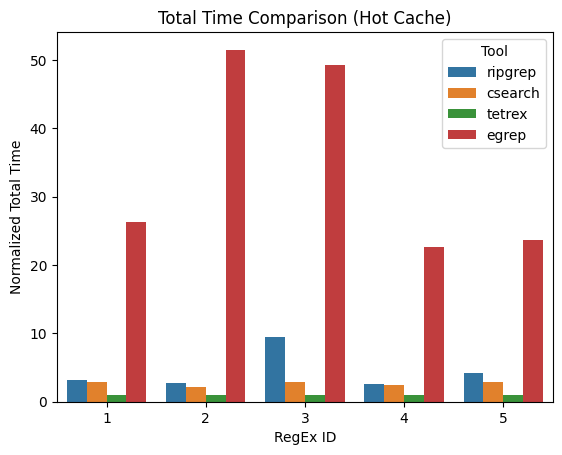

In [313]:
sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="Normalized Total Time", hue="Tool").set_title("Total Time Comparison (Hot Cache)")

Text(0.5, 1.0, 'Query Time Comparison (Hot Cache)')

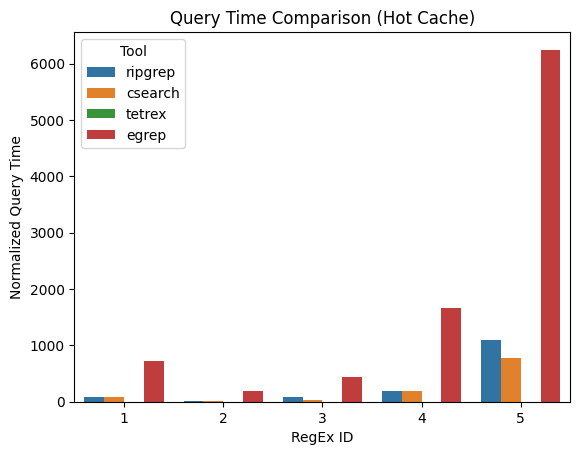

In [314]:
sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="Normalized Query Time", hue="Tool").set_title("Query Time Comparison (Hot Cache)")

Text(0.5, 1.0, 'Normalized Total Time Comparison (Cold Cache)')

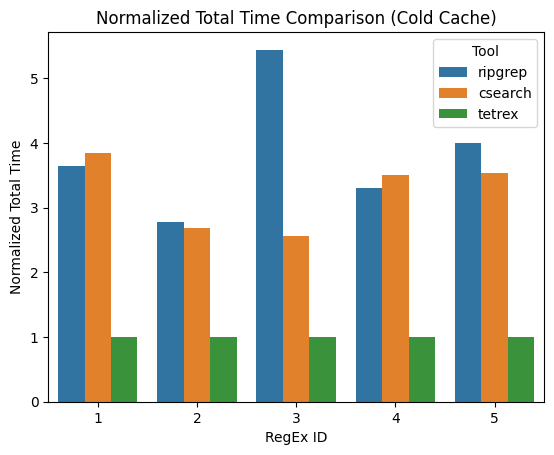

In [315]:
sns.barplot(sim_df[(sim_df["Tool"] != "egrep") & (sim_df["Cache"] == "cold")], x="RegEx ID", y="Normalized Total Time", hue="Tool").set_title("Normalized Total Time Comparison (Cold Cache)")

Text(0.5, 1.0, 'Normalized Query Time Comparison (Cold Cache)')

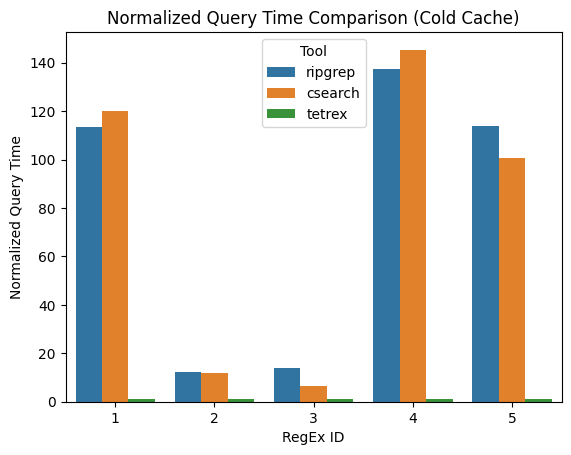

In [316]:
sns.barplot(sim_df[(sim_df["Tool"] != "egrep") & (sim_df["Cache"] == "cold")], x="RegEx ID", y="Normalized Query Time", hue="Tool").set_title("Normalized Query Time Comparison (Cold Cache)")

Text(0.5, 1.0, 'Normalized Query Time Comparison (Hot Cache)')

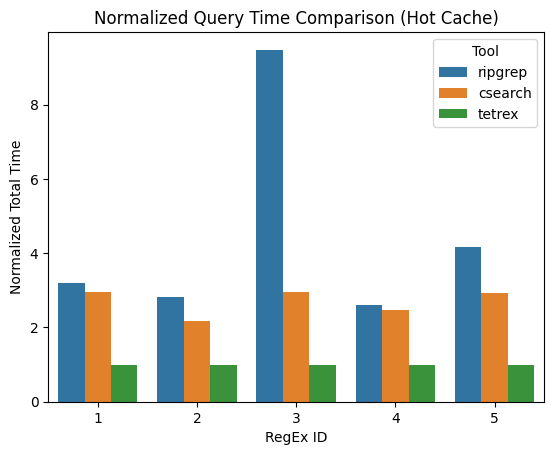

In [317]:
sns.barplot(sim_df[(sim_df["Tool"] != "egrep") & (sim_df["Cache"] == "hot")], x="RegEx ID", y="Normalized Total Time", hue="Tool").set_title("Normalized Query Time Comparison (Hot Cache)")

Text(0.5, 1.0, 'Normalized Query Time Comparison (Hot Cache)')

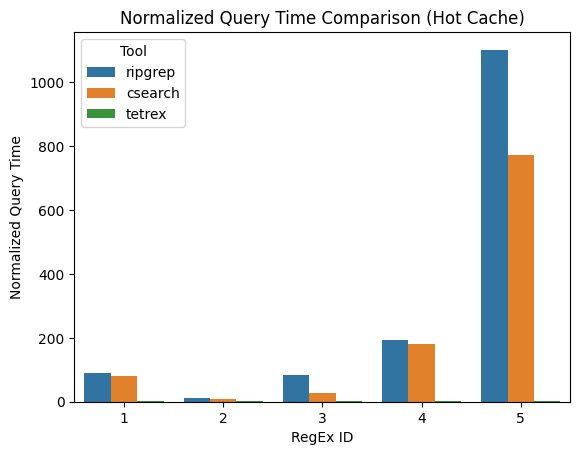

In [318]:
sns.barplot(sim_df[(sim_df["Tool"] != "egrep") & (sim_df["Cache"] == "hot")], x="RegEx ID", y="Normalized Query Time", hue="Tool").set_title("Normalized Query Time Comparison (Hot Cache)")

## Gb/s Normalization

In [338]:
sim_df["GB/s"] = 4/sim_df["query time (s)"]

In [337]:
sim_df["GB/s (with Index Load Time)"] = 4/sim_df["total time (s)"]

In [340]:
sim_df[sim_df["Cache"] == "hot"]

,RegEx ID,Tool,Cache,total time (s),query time (s),GB/s (with Index Load Time),GB/s
5,1,ripgrep,hot,7.275000,7.275000,0.549828,0.549828
6,2,ripgrep,hot,8.595000,8.595000,0.465387,0.465387
7,3,ripgrep,hot,21.271000,21.271000,0.188049,0.188049
8,4,ripgrep,hot,7.019000,7.019000,0.569882,0.569882
9,5,ripgrep,hot,9.465000,9.465000,0.422610,0.422610
15,1,csearch,hot,6.697000,6.697000,0.597282,0.597282
16,2,csearch,hot,6.641756,6.641756,0.602250,0.602250
17,3,csearch,hot,6.635184,6.635184,0.602847,0.602847
18,4,csearch,hot,6.640707,6.640707,0.602346,0.602346
19,5,csearch,hot,6.637957,6.637957,0.602595,0.602595


In [341]:
sim_df[sim_df["Cache"] == "cold"]

,RegEx ID,Tool,Cache,total time (s),query time (s),GB/s (with Index Load Time),GB/s
0,1,ripgrep,cold,9.562000,9.562000,0.418323,0.418323
1,2,ripgrep,cold,10.341000,10.341000,0.386810,0.386810
2,3,ripgrep,cold,21.840000,21.840000,0.183150,0.183150
3,4,ripgrep,cold,9.542000,9.542000,0.419199,0.419199
4,5,ripgrep,cold,11.385000,11.385000,0.351339,0.351339
10,1,csearch,cold,10.100000,10.100000,0.396040,0.396040
11,2,csearch,cold,10.027881,10.027881,0.398888,0.398888
12,3,csearch,cold,10.301633,10.301633,0.388288,0.388288
13,4,csearch,cold,10.095272,10.095272,0.396225,0.396225
14,5,csearch,cold,10.091027,10.091027,0.396392,0.396392


Text(0, 0.5, 'GB/s (with Load Time)')

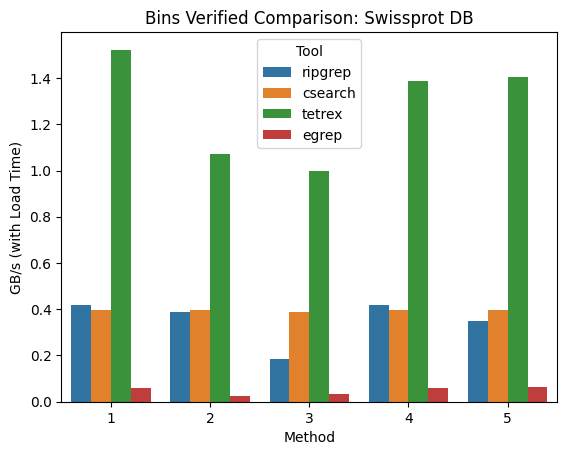

In [345]:
fig, axes = plt.subplots()
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="GB/s (with Index Load Time)", hue="Tool", ax=axes)
axes.set_title('Bins Verified Comparison: Swissprot DB')
axes.set_xlabel('Method')
axes.set_ylabel('GB/s (with Load Time)')

Text(0.5, 1.0, 'Total Runtime Comparison (Cold Cache)')

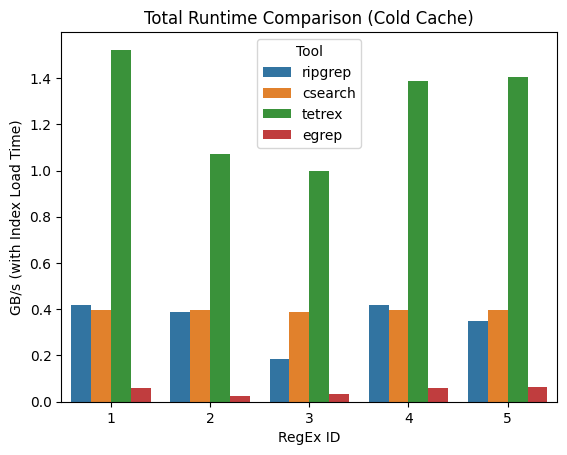

In [343]:
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="GB/s (with Index Load Time)", hue="Tool").set_title("Total Runtime Comparison (Cold Cache)")

Text(0.5, 1.0, 'Query Comparison (Cold Cache)')

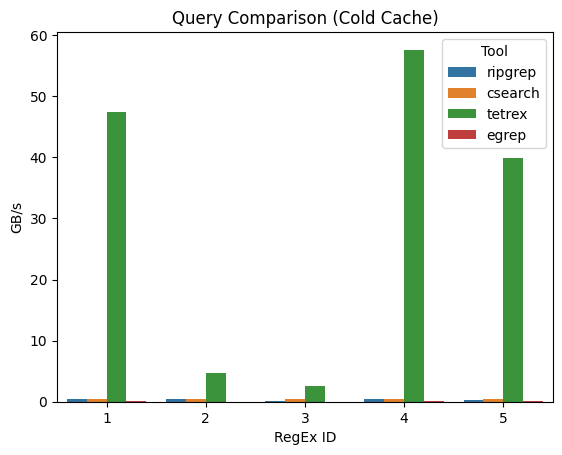

In [303]:
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="GB/s", hue="Tool").set_title("Query Runtime Comparison (Cold Cache)")

Text(0.5, 1.0, 'Query Comparison (Hot Cache)')

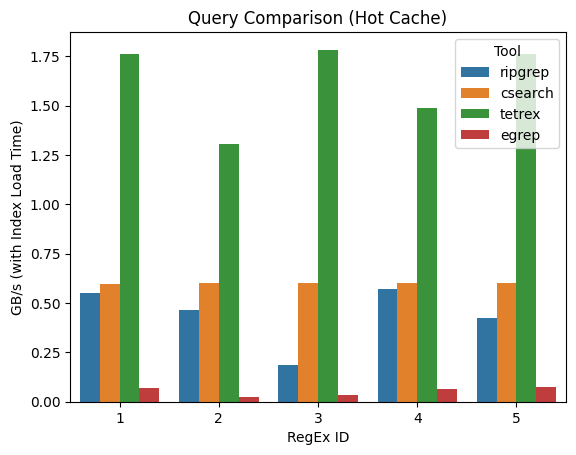

In [333]:
sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="GB/s (with Index Load Time)", hue="Tool").set_title("Total Runtime Comparison (Hot Cache)")

Text(0.5, 1.0, 'Query Comparison (Hot Cache)')

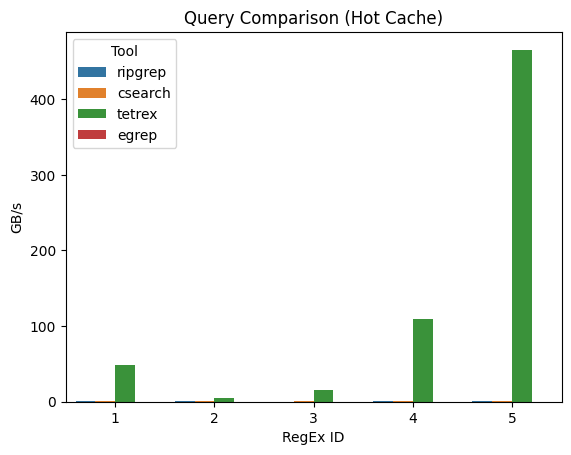

In [304]:
sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="GB/s", hue="Tool").set_title("Query Runtime Comparison (Hot Cache)")

## Swissprot with RipGrep

In [249]:
sprot_df = pd.read_csv("/Users/rschwab/repos/TetRex/data/RESULTS/all_sprot_times.tsv", sep="\t")

In [250]:
sprot_df

,NAME,ID,PATTERN,GROUP_COUNT,REGEX,PROSITE,CSEARCH,TETREX_IBF,TETREX,EGREP,BIN_COUNT,CSEARCH_BINS,TETREX_BINS,CSEARCH_FP,TETREX_FP,RIPGREP
0,ANTENNAPEDIA,PS00032,[LIVMFE]-[FY]-P-W-M-[KRQTA],5,(L|I|V|M|F|E)(F|Y)PWM(K|R|Q|T|A),10.686,0.208119,0.009352,0.074809,14.592,7,479,561,472,554,0.132
1,ENGRAILED,PS00033,L-M-A-[EQ]-G-L-Y-N,7,LMA(E|Q)GLYN,10.512,0.430810,0.001576,0.001713,3.324,3,991,3,988,0,0.373
2,DNA_MISMATCH_REPAIR_1,PS00058,G-F-R-G-E-[AG]-L,6,GFRGE(A|G)L,10.902,0.430812,0.028046,0.003708,2.959,7,991,8,984,1,0.152
3,L_LDH,PS00064,[LIVMA]-G-[EQ]-H-G-[DN]-[ST],6,(L|I|V|M|A)G(E|Q)HG(D|N)(S|T),10.712,0.430432,0.006144,0.002450,11.240,3,993,10,990,7,0.128
4,G6P_DEHYDROGENASE,PS00069,D-H-[YF]-L-G-K-[EQK],6,DH(Y|F)LGK(E|Q|K),9.343,0.421385,0.002936,0.001794,2.271,1,959,4,958,3,0.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,COE,PS01345,C-S-R-C-C-[DE]-[KR]-K-S-C,9,CSRCC(D|E)(K|R)KSC,9.409,0.291799,0.004174,0.001186,1.982,3,623,3,620,0,0.110
112,NODA,PS01349,[RHQ]-[ST]-W-[GSA]-G-A-R-P-E,8,(R|H|Q)(S|T)W(G|S|A)GARPE,10.440,0.441299,0.001652,0.001152,7.759,1,959,1,958,0,0.124
113,PHOSPHOKETOLASE_1,PS60002,E-G-G-E-L-G-Y,6,EGGELGY,9.395,0.475324,0.004374,0.001588,2.624,4,1003,4,999,0,0.106
114,CYCLOTIDE_MOEBIUS,PS60009,C-[GA]-E-[ST]-C-[FTV]-[GLTI]-G-[TSK]-C,9,C(G|A)E(S|T)C(F|T|V)(G|L|T|I)G(T|S|K)C,9.621,0.468257,0.006375,0.004876,3.115,10,1013,10,1003,0,0.185


In [251]:
sprot_melt = pd.melt(sprot_df, id_vars=["ID"], value_vars=["PROSITE","EGREP","CSEARCH", "RIPGREP", "TETREX"])
sprot_melt.columns = ["RegEx ID", "Tool", "Runtime (s)"]

### Compute Runtime Factor Increase

In [252]:
ids = pd.Series(sprot_df.ID)
tetrex = pd.Series(sprot_df.TETREX/sprot_df.TETREX)
ripgrep = pd.Series(sprot_df.RIPGREP/sprot_df.TETREX)
csearch = pd.Series(sprot_df.CSEARCH/sprot_df.TETREX)
egrep = pd.Series(sprot_df.EGREP/sprot_df.TETREX)
prosite = pd.Series(sprot_df.PROSITE/sprot_df.TETREX)

In [253]:
factor_df = pd.concat([ids,tetrex, ripgrep, csearch, egrep, prosite], axis=1)

In [254]:
factor_df.columns = ["ID","TETREX","RIPGREP","CSEARCH","EGREP","PROSITE"]

In [255]:
factor_df

,ID,TETREX,RIPGREP,CSEARCH,EGREP,PROSITE
0,PS00032,1.0,1.764494,2.782005,195.056745,142.843775
1,PS00033,1.0,217.746643,251.494454,1940.455342,6136.602452
2,PS00058,1.0,40.992449,116.184466,798.004315,2940.129450
3,PS00064,1.0,52.244898,175.686531,4587.755102,4372.244898
4,PS00069,1.0,162.207358,234.885730,1265.886288,5207.915273
...,...,...,...,...,...,...
111,PS01345,1.0,92.748735,246.036256,1671.163575,7933.389545
112,PS01349,1.0,107.638889,383.072049,6735.243056,9062.500000
113,PS60002,1.0,66.750630,299.322418,1652.392947,5916.246851
114,PS60009,1.0,37.940935,96.033019,638.843314,1973.133716


In [256]:
factor_melt = pd.melt(factor_df, id_vars=["ID"], value_vars=["PROSITE","EGREP","CSEARCH", "RIPGREP", "TETREX"])

In [257]:
factor_melt.columns = ["ID","Tool","Runtime Factor Increase"]

Text(0.5, 1.0, 'Swissprot Runtime Analysis')

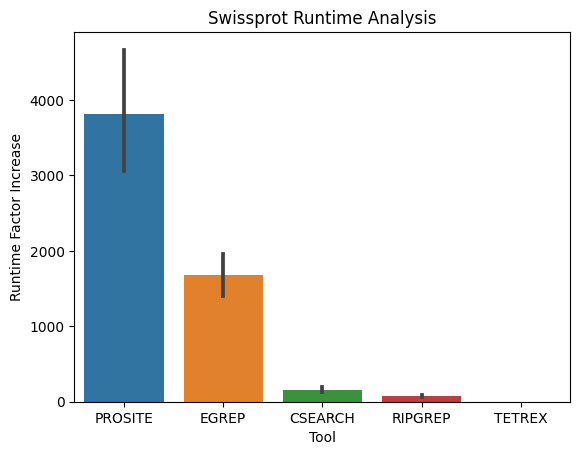

In [258]:
sns.barplot(factor_melt, x="Tool", y="Runtime Factor Increase").set_title("Swissprot Runtime Analysis")

# Gb/s Analysis

In [207]:
ids = pd.Series(sprot_df.ID)
ttx = pd.Series(.267/sprot_df.TETREX)
rpg = pd.Series(.267/sprot_df.RIPGREP)
cs = pd.Series(.267/sprot_df.CSEARCH)
egp = pd.Series(.267/sprot_df.EGREP)
prt = pd.Series(.267/sprot_df.PROSITE)

In [208]:
churn_df = pd.concat([ids,ttx, rpg, cs, egp, prt], axis=1)

In [209]:
factor_df.columns = ["ID","TETREX","RIPGREP","CSEARCH","EGREP","PROSITE"]

In [210]:
churn_df

,ID,TETREX,RIPGREP,CSEARCH,EGREP,PROSITE
0,PS00032,3.569089,2.022727,1.282920,0.018298,0.024986
1,PS00033,155.866900,0.715818,0.619763,0.080325,0.025400
2,PS00058,72.006472,1.756579,0.619760,0.090233,0.024491
3,PS00064,108.979592,2.085938,0.620307,0.023754,0.024925
4,PS00069,148.829431,0.917526,0.633625,0.117569,0.028578
...,...,...,...,...,...,...
111,PS01345,225.126476,2.427273,0.915013,0.134712,0.028377
112,PS01349,231.770833,2.153226,0.605032,0.034412,0.025575
113,PS60002,168.136020,2.518868,0.561722,0.101753,0.028419
114,PS60009,54.757998,1.443243,0.570200,0.085714,0.027752


In [211]:
churn_melt = pd.melt(churn_df, id_vars=["ID"], value_vars=["PROSITE","EGREP","CSEARCH", "RIPGREP", "TETREX"])

In [212]:
churn_melt.columns = ["ID","Tool","GB/s"]

Text(0.5, 1.0, 'Swissprot Runtime Analysis')

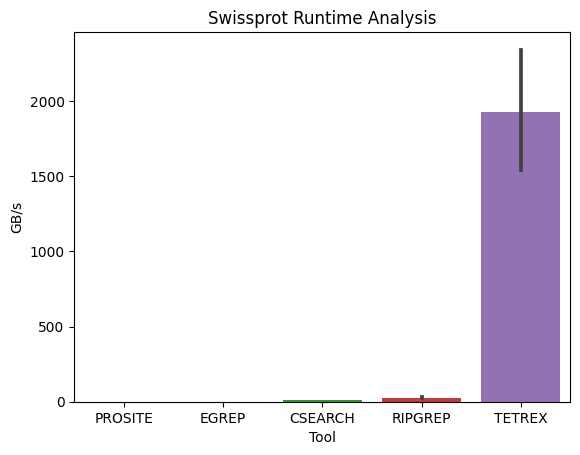

In [206]:
sns.barplot(churn_melt, x="Tool", y="GB/s").set_title("Swissprot Runtime Analysis")